In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
presence = pd.read_excel('indicatorPresence.xlsx')
consol = pd.read_excel('indicatorConsol.xlsx')

In [3]:
presence.columns = presence.iloc[0]
presence = presence.reindex(presence.index.drop(0)).reset_index(drop=True)
presence.columns.name = None

In [4]:
consol.columns = consol.iloc[0]
consol = consol.reindex(consol.index.drop(0)).reset_index(drop=True)
consol.columns.name = None

In [5]:
consol = consol.rename(columns={'HQCountry':'HQ'})
presence = presence.rename(columns = {'HQ Country':'HQ', 'MNE Name': 'MNE'})

In [6]:
presence = presence.loc[:, ~presence.columns.duplicated()]

In [7]:
presence = presence.replace('Not found',0)
presence = presence.replace('Annual Reports',1)
presence = presence.replace('Physical',2)
presence = presence.replace('Digital',3)

In [8]:
df = pd.merge(consol, presence, on = 'MNE')

In [30]:
df.columns

Index(['MNE', 'ISIC', 'Source', 'EndPeriod', 'TotAssets', 'CurrentAssets',
       'Cash', 'inventories', 'Non-currentAssets', 'IntangibleAssets',
       ...
       'HQ_x_IND', 'HQ_x_ITA', 'HQ_x_JEY', 'HQ_x_JPN', 'HQ_x_KOR', 'HQ_x_LUX',
       'HQ_x_NLD', 'HQ_x_RUS', 'HQ_x_TWN', 'HQ_x_USA'],
      dtype='object', length=311)

### Q1. How are MNEs distributed by geography and by sector?

In [10]:
top_countries_HQ = df.groupby(['HQ_x']).count().sort_values(by='MNE',ascending=False).head(10)
top_countries_HQ

,MNE,ISIC,PrimaryISICCode,AccountingStandard,Source,EndPeriod,TotAssets,CurrentAssets,Cash,inventories,...,NFK,SLB,CPV,KIR,KNA,SDN,MCO,ABW,MHL,SXM
HQ_x,,,,,,,,,,,,,,,,,,,,,
USA,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
JPN,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
DEU,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
GBR,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
FRA,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
NLD,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
CHE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
KOR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
RUS,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


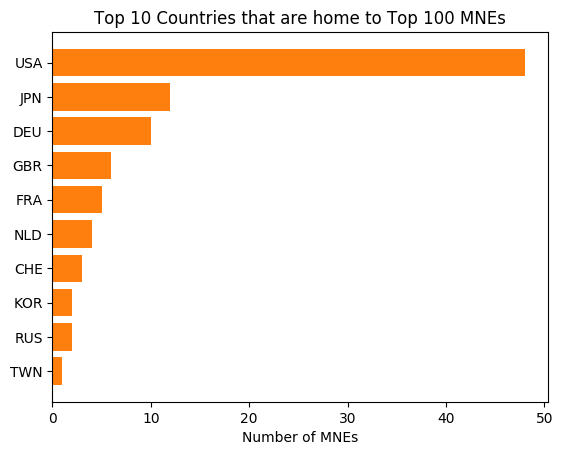

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
country = top_countries_HQ.index
y_pos = np.arange(len(country))
no_MNEs = top_countries_HQ.MNE

color = 'tab:Orange'
ax.barh(y_pos, no_MNEs, align='center', color = color)
ax.set_yticks(y_pos)
ax.set_yticklabels(country)
ax.invert_yaxis() 
ax.set_xlabel('Number of MNEs')
ax.set_title('Top 10 Countries that are home to Top 100 MNEs')

plt.show()

In [12]:
top_ISIC = df.groupby(['PrimaryISICCode']).count().sort_values(by='MNE',ascending=False).head(10)
top_ISIC
#df[['ISIC','PrimaryISICCode']]

,MNE,HQ_x,ISIC,AccountingStandard,Source,EndPeriod,TotAssets,CurrentAssets,Cash,inventories,...,NFK,SLB,CPV,KIR,KNA,SDN,MCO,ABW,MHL,SXM
PrimaryISICCode,,,,,,,,,,,,,,,,,,,,,
"29 - Manufacture of motor vehicles, trailers and semi-trailers",13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
47 - Retail trade (excluding motor vehicles),13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
19 - Manuf. of coke and refined petroleum prod.,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
"26 - Manuf. of computer, electronic and optical prod.",9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
61 - Telecommunications,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
21 - Manuf. of basic pharmaceutical prod.,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
86 - Human health activities,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
"65 - Insurance, reinsurance and pension funding",4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
10 - Manuf. of food products,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


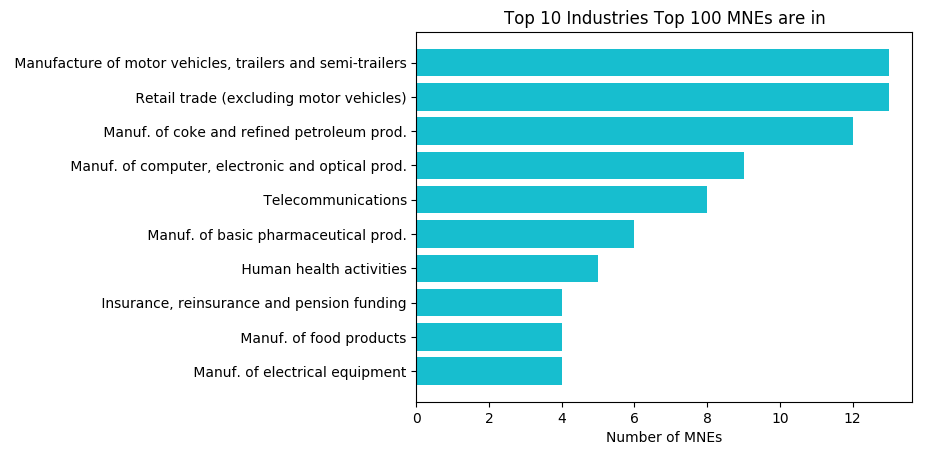

In [13]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ISIC = top_ISIC.index.str.slice(start=4)
y_pos = np.arange(len(country))
no_MNEs = top_ISIC.MNE
color = 'tab:cyan'

ax.barh(y_pos, no_MNEs, align='center', color = color)
ax.set_yticks(y_pos)
ax.set_yticklabels(ISIC)
ax.invert_yaxis() 
ax.set_xlabel('Number of MNEs')
ax.set_title('Top 10 Industries Top 100 MNEs are in')

plt.show()

### Q2. Is firm productivity correlate to their industrial organisation?

In [14]:
### Measure Diversity

total_countries = presence.shape[1] -2
total_countries

given = {1,2,3}
df['dispersion'] = df.isin(given).sum(1)/total_countries
df.head(3)

,MNE,HQ_x,ISIC,PrimaryISICCode,AccountingStandard,Source,EndPeriod,TotAssets,CurrentAssets,Cash,...,SLB,CPV,KIR,KNA,SDN,MCO,ABW,MHL,SXM,dispersion
0,Nestle SA,CHE,C,10 - Manuf. of food products,IFRS,https://www.nestle.com/asset-library/documents...,2016-12-31 00:00:00,129.469,31.4267,7.84268,...,0,0,0,0,0,0,0,0,0,0.563063
1,Archer Daniels Midland Co,USA,C,10 - Manuf. of food products,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,39.769,21.045,0.619,...,0,0,0,0,0,0,0,1,0,0.216216
2,Unilever NV,NLD,C,10 - Manuf. of food products,IFRS,https://www.unilever.com/Images/unilever-annua...,2016-12-31 00:00:00,59.4818,14.418,3.56496,...,0,0,0,0,0,0,0,0,0,0.468468


In [15]:
#presence.head(3)
#consol.columns
#list(df.columns)
#df.ISIC.sum()
#df[df.MNE=='Unilever NV']
df.dispersion.describe()

count    100.000000
mean       0.205631
std        0.164105
min        0.009009
25%        0.070946
50%        0.159910
75%        0.322072
max        0.860360
Name: dispersion, dtype: float64

In [16]:
countries = {'USA','JPN'}
df['productivity'] = (df['Revenue']*1000000/df['Employees']) - 0.4*(df['NetAssets']*1000000/df['Employees'])
top_productivity_MNE = df.sort_values(['dispersion','productivity'], ascending=False)[df.HQ_x.isin(countries)]
#top_productivity_MNE

/Users/bobbleoxs/.virtualenvs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
top_productivity_MNE

,MNE,HQ_x,ISIC,PrimaryISICCode,AccountingStandard,Source,EndPeriod,TotAssets,CurrentAssets,Cash,...,CPV,KIR,KNA,SDN,MCO,ABW,MHL,SXM,dispersion,productivity
86,Alphabet Inc,USA,J,63 - Information service activities,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,167.497,105.408,12.918,...,3,3,0,0,0,0,0,0,0.860360,481.001
32,International Business Machines Corp,USA,C,"26 - Manuf. of computer, electronic and optica...",US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,117.47,43.888,7.826,...,0,0,0,0,0,0,0,0,0.414414,179.254
39,Dell Technologies Inc,USA,C,27 - Manuf. of electrical equipment,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2017-02-03 00:00:00,118.206,30.773,9.474,...,0,0,0,0,0,0,0,0,0.405405,390.913
4,PepsiCo Inc,USA,C,11 - Manuf. of beverages,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,73.49,26.45,9.158,...,0,0,0,0,0,0,0,0,0.405405,220.907
21,Procter & Gamble Co,USA,C,21 - Manuf. of basic pharmaceutical prod.,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2017-06-30 00:00:00,120.406,26.494,5.569,...,0,0,0,0,0,0,0,0,0.400901,449.966
22,Pfizer Inc,USA,C,21 - Manuf. of basic pharmaceutical prod.,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,171.615,38.949,2.595,...,0,0,0,0,0,0,0,0,0.369369,299.358
42,General Motors Co,USA,C,"29 - Manufacture of motor vehicles, trailers a...",US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,221.69,65.025,12.574,...,0,0,0,0,0,0,0,0,0.342342,584.684
37,Sony Corp,JPN,C,27 - Manuf. of electrical equipment,US GAAP,https://www.sony.net/SonyInfo/IR/library/FY201...,2017-03-31 00:00:00,157.933,38.9519,8.58626,...,0,0,0,0,0,0,0,0,0.333333,384.677
17,DowDuPont Inc,USA,C,20 - Manuf. of chemicals and chemical prod.,US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-12-31 00:00:00,79.511,23.659,6.607,...,0,0,0,0,0,0,0,0,0.328829,380.269
35,HP Inc,USA,C,"26 - Manuf. of computer, electronic and optica...",US GAAP,https://www.sec.gov/cgi-bin/viewer?action=view...,2016-10-31 00:00:00,28.987,18.468,6.288,...,0,0,0,0,0,0,0,0,0.319820,1016.2


No handles with labels found to put in legend.


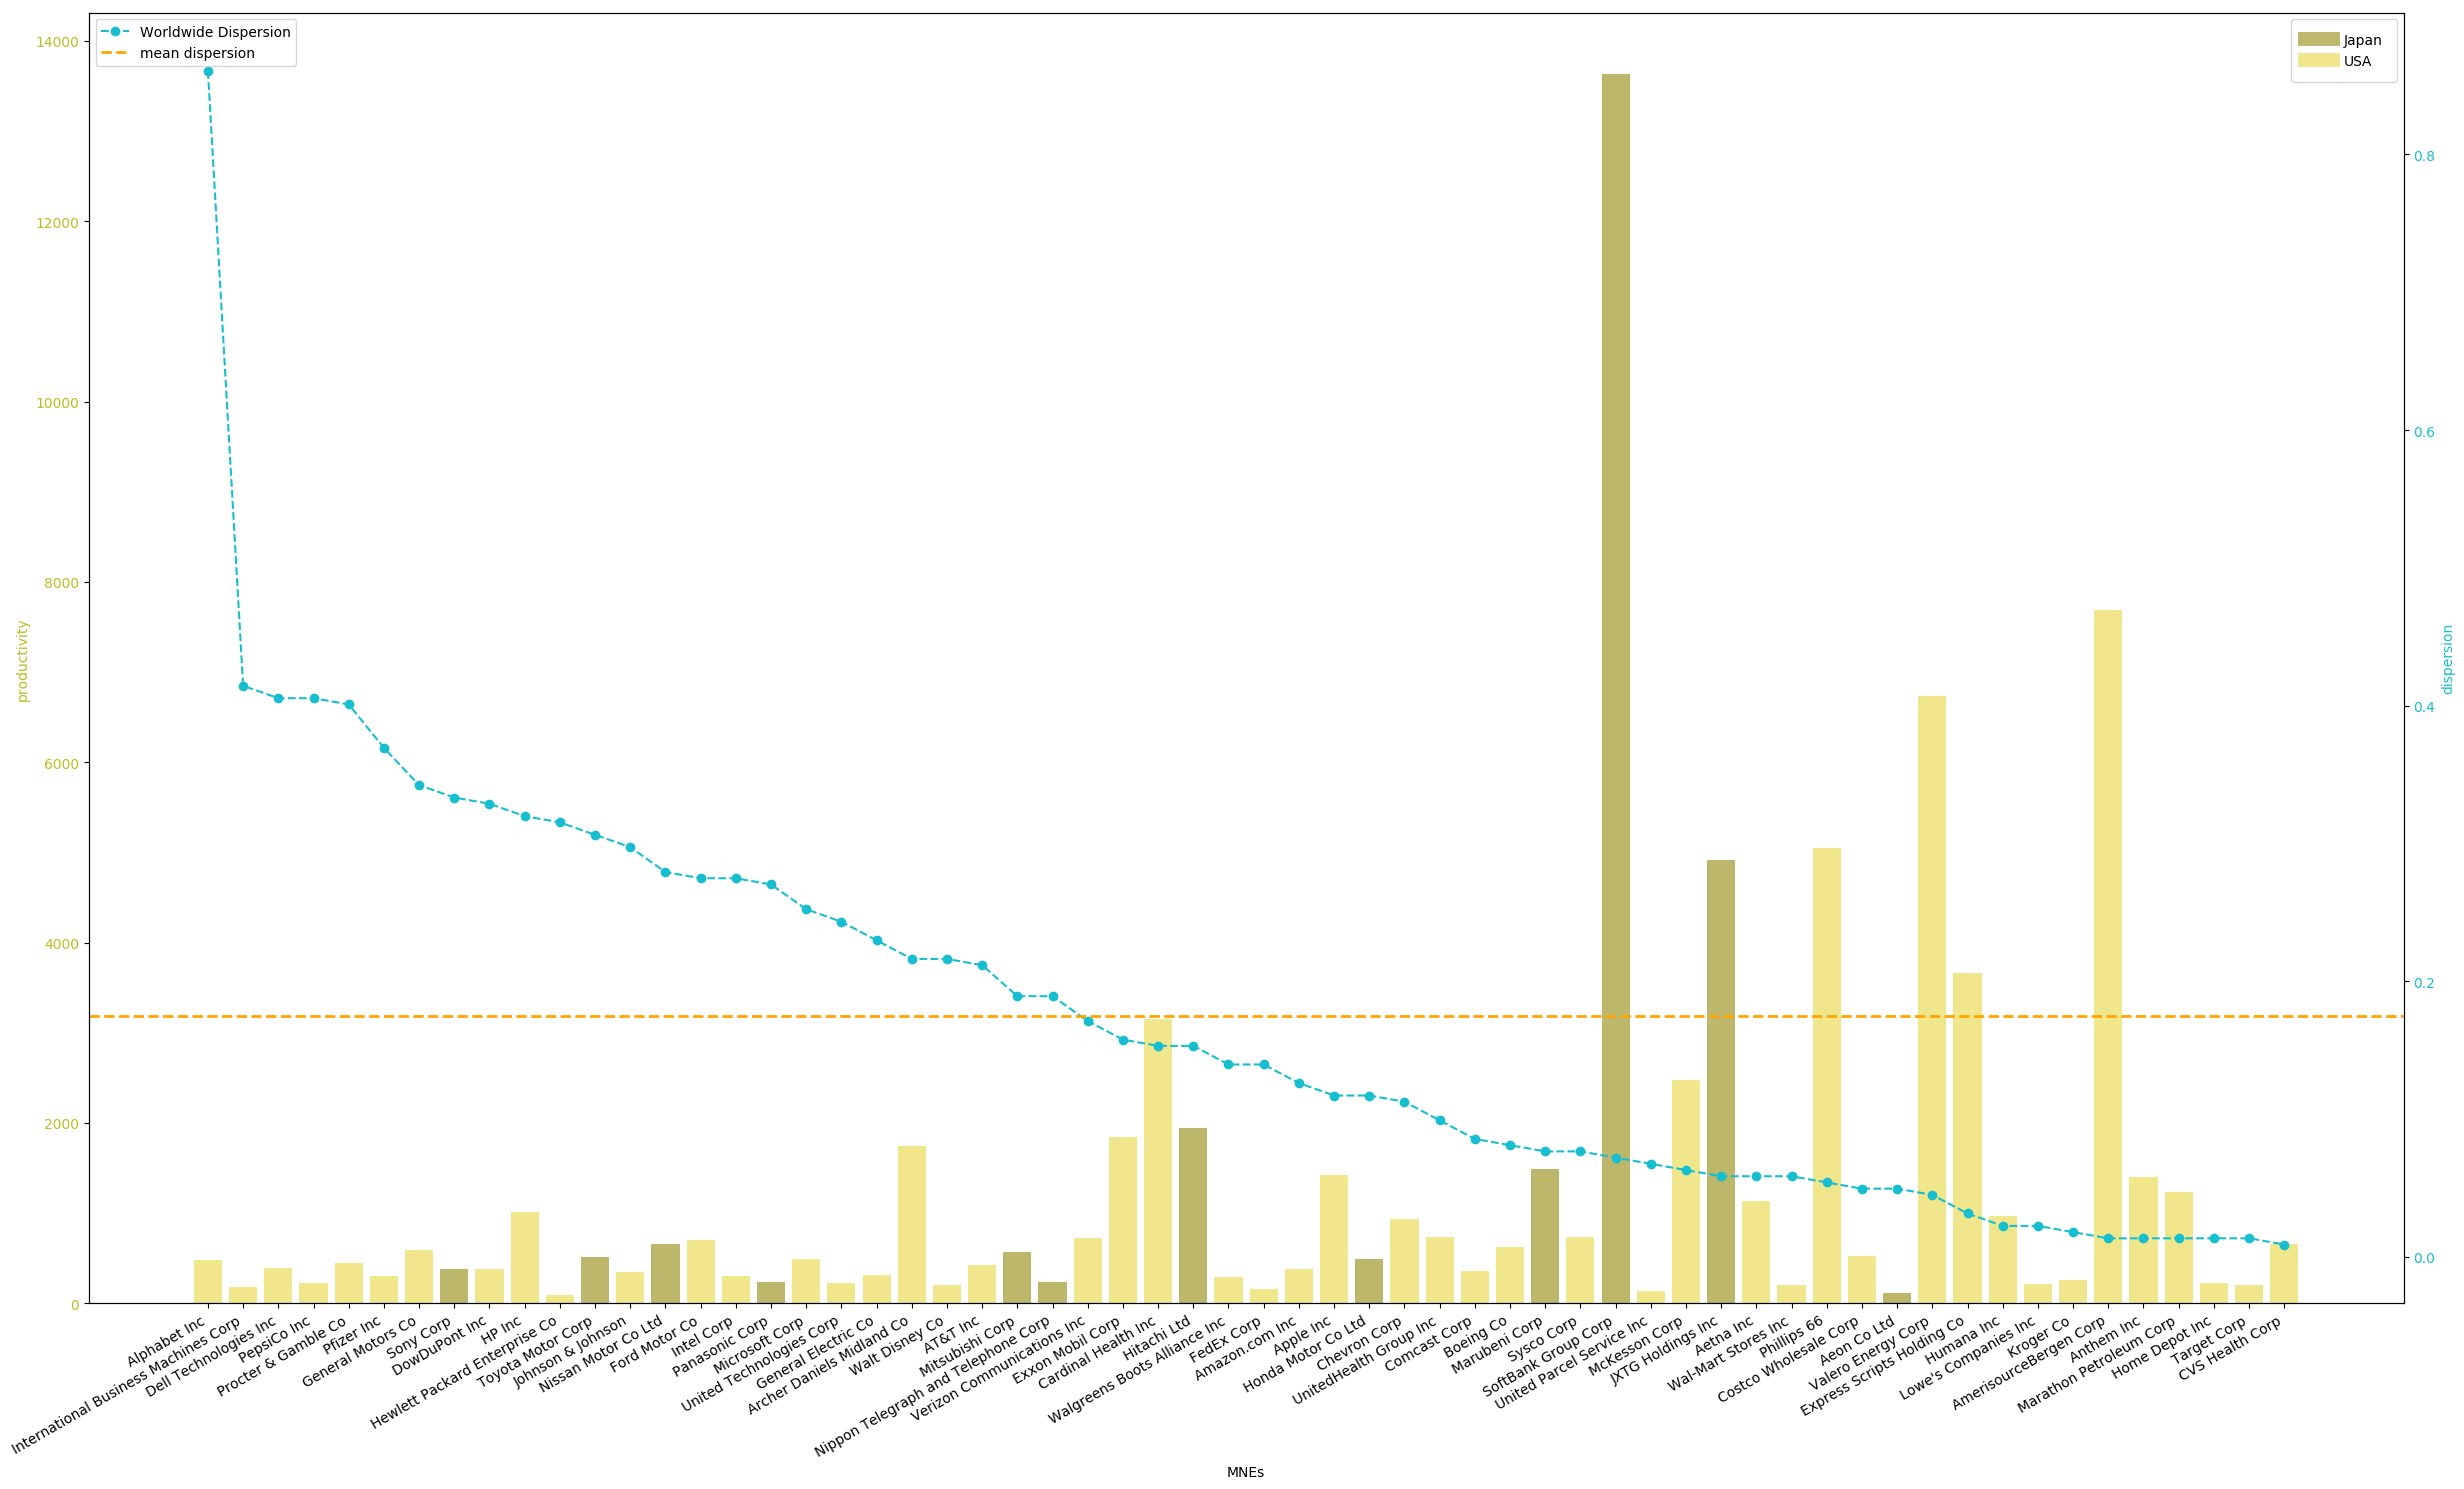

In [18]:
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

x = top_productivity_MNE['MNE']
productivity = top_productivity_MNE['productivity']
dispersion = top_productivity_MNE['dispersion']
country_selected = top_productivity_MNE['HQ_x']

def millions(x, pos):
    #'The two args are the value and tick position'
    return '$%1.1fM' % (x)


formatter = FuncFormatter(millions)

fig, ax1 = plt.subplots(figsize=(25, 15))
color_map = {'USA': 'khaki', 'JPN': 'darkkhaki'}
color = 'tab:olive'

ax1.set_xlabel('MNEs')
ax1.set_ylabel('productivity', color= color)
ax1.bar(x, productivity, color=top_productivity_MNE['HQ_x'].map(color_map))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:cyan'
ax2.set_ylabel('dispersion', color=color)  
ax2.plot(x, dispersion, color=color, linestyle='--', marker='o', label = 'Worldwide Dispersion')
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(dispersion.mean(), linewidth = 2, color = 'orange', label = 'mean dispersion', linestyle='--')

ax1.legend(loc=0)
ax2.legend(loc=2)

custom_lines = [Line2D([0], [0], color='darkkhaki', lw=10),
                Line2D([0], [0], color='khaki', lw=10)]
ax1.legend(custom_lines, ['Japan', 'USA'], borderpad=1)
#plt.xticks(rotation=90)

fig.autofmt_xdate()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Q3. What are the factors for worldwide dispersion?¶

In [19]:
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [20]:
#df.to_csv('df.csv')
#df.head(3)
#list(df.columns)
list(df.columns)

['MNE',
 'HQ_x',
 'ISIC',
 'PrimaryISICCode',
 'AccountingStandard',
 'Source',
 'EndPeriod',
 'TotAssets',
 'CurrentAssets',
 'Cash',
 'inventories',
 'Non-currentAssets',
 'IntangibleAssets',
 'Goodwill',
 'PPE',
 'DeferredTaxAssets',
 'HFSAssets',
 'TotLiabilities',
 'CurrentLiabilities',
 'NonCurrentLiabilities',
 'DeferrtedTaxLiabilities',
 'HFSLiabilities',
 'NetAssets',
 'RedeemableNon-ControllingInterest',
 'Non-controllingShareholderEquity',
 'ShareholderEquity',
 'RetainedEarnings',
 'Revenue',
 'OtherIncome',
 'IncomeAffiliates',
 'COG_x',
 'SG&A',
 'OtherExpense',
 'Depreciation',
 'R&D',
 'Wages&Salaries',
 'PBT',
 'ProvisionsIncomeTax',
 'IncomeDisctOperations',
 'IncomeAffliatesafterTAZ',
 'NetProfit',
 'NPEquityShareholders',
 'NPNon-controllingInterest',
 'Employees',
 'HQ_y',
 'USA',
 'GBR',
 'NLD',
 'CAN',
 'DEU',
 'CHN',
 'BRA',
 'SGP',
 'MEX',
 'FRA',
 'ESP',
 'ITA',
 'BEL',
 'IRL',
 'AUS',
 'IND',
 'JPN',
 'CHE',
 'LUX',
 'TUR',
 'POL',
 'CZE',
 'RUS',
 'AUT',
 'Z

In [21]:
df.PrimaryISICCode = df.PrimaryISICCode.str.slice(start=4)
df = pd.get_dummies(df, columns=['PrimaryISICCode', 'AccountingStandard', 'HQ_x'])

In [22]:
#df2['ISIC'], df2['ISICDes'] = df2['PrimaryISICCode'].str.split(' - ', 1).str
cols = ['productivity',
 'PrimaryISICCode_ Electricity, gas, steam and air conditioning',
 'PrimaryISICCode_ Financial service activities (excl. ISIC 74)',
 'PrimaryISICCode_ Food and beverage service activities',
 'PrimaryISICCode_ Human health activities',
 'PrimaryISICCode_ Information service activities',
 'PrimaryISICCode_ Insurance, reinsurance and pension funding',
 'PrimaryISICCode_ Manuf. of basic pharmaceutical prod.',
 'PrimaryISICCode_ Manuf. of beverages',
 'PrimaryISICCode_ Manuf. of chemicals and chemical prod.',
 'PrimaryISICCode_ Manuf. of coke and refined petroleum prod.',
 'PrimaryISICCode_ Manuf. of computer, electronic and optical prod.',
 'PrimaryISICCode_ Manuf. of electrical equipment',
 'PrimaryISICCode_ Manuf. of food products',
 'PrimaryISICCode_ Manuf. of metal prod. (exc. ISIC 35)',
 'PrimaryISICCode_ Manuf. of other transport equipment',
 'PrimaryISICCode_ Manufacture of motor vehicles, trailers and semi-trailers',
 'PrimaryISICCode_ Other prof., scientific and technical activities',
 'PrimaryISICCode_ Postal and courier activities',
 'PrimaryISICCode_ Retail trade (excluding motor vehicles)',
 'PrimaryISICCode_ Telecommunications',
 'PrimaryISICCode_ Wholesale trade (excluding motor vehicles)',
 'AccountingStandard_IFRS',
 'AccountingStandard_Ind-AS',
 'AccountingStandard_Japanese GAAP',
 'AccountingStandard_K-IFRS',
 'AccountingStandard_US GAAP',
 'HQ_x_BRA',
 'HQ_x_CHE',
 'HQ_x_DEU',
 'HQ_x_ESP',
 'HQ_x_FRA',
 'HQ_x_GBR',
 'HQ_x_IND',
 'HQ_x_ITA',
 'HQ_x_JEY',
 'HQ_x_JPN',
 'HQ_x_KOR',
 'HQ_x_LUX',
 'HQ_x_NLD',
 'HQ_x_RUS',
 'HQ_x_TWN',
 'HQ_x_USA','TotAssets',
 'CurrentAssets',
 'Cash',
 'inventories',
 'Non-currentAssets',
 'IntangibleAssets',
 'Goodwill',
 'PPE',
 'DeferredTaxAssets',
 'HFSAssets',
 'TotLiabilities',
 'CurrentLiabilities',
 'NonCurrentLiabilities',
 'DeferrtedTaxLiabilities',
 'HFSLiabilities',
 'NetAssets',
 'RedeemableNon-ControllingInterest',
 'Non-controllingShareholderEquity',
 'ShareholderEquity',
 'RetainedEarnings',
 'Revenue',
 'OtherIncome',
 'IncomeAffiliates',
 'COG_x',
 'SG&A',
 'OtherExpense',
 'Depreciation',
 'R&D',
 'Wages&Salaries',
 'PBT',
 'ProvisionsIncomeTax',
 'IncomeDisctOperations',
 'IncomeAffliatesafterTAZ',
 'NetProfit',
 'NPEquityShareholders',
 'NPNon-controllingInterest',
 'Employees']

In [23]:
df[cols]=df[cols].replace("n.a",0).astype('float') 

In [24]:
X = df[cols]
y = df.dispersion

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

0.03709479412399566
[-2.85385114e-05 -1.08200748e-01  1.21889960e+00 -1.24159858e-01
 -8.05539753e-02  8.44445753e-01 -1.93090889e-01  9.64048726e-02
  6.39358794e-02 -9.15488936e-03 -3.58229904e-02  1.05120918e-01
  5.87081350e-02  1.57839584e-01 -3.42744718e-02 -6.28398774e-02
  6.00957860e-02 -1.25633478e-01 -1.42592855e-01 -1.67896514e-01
 -1.80049827e-01 -8.48313475e+00  9.11246156e-02  2.47216142e-01
 -1.22903072e-01  1.63990015e-01  3.84919322e-01 -3.06927379e-01
  2.92185821e-01  2.59001871e-01  1.68646573e-01  1.26709353e-01
  1.28031961e-01  2.45394472e-01  1.00808648e-01  1.80140402e-02
  4.33255996e-02  1.63823162e-01 -3.67201945e-02  2.74941819e-02
  2.64799193e-02 -2.39383037e-01 -2.53393443e-01 -4.31331325e+03
  6.65785131e+01  1.09906593e-02 -1.35780857e-03  6.65731446e+01
 -8.29881681e-04  8.87510688e-03  5.46098876e-03  3.89691739e-03
  6.66381272e+01  4.31543002e+03 -6.86960461e+01 -6.86914807e+01
  6.77853622e-03 -6.87618398e+01 -1.66479126e+04  2.08946776e+04
  2.0

In [25]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             dispersion   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              7.611
Date:                Thu, 17 Oct 2019   Prob (F-statistic):                    3.71e-07
Time:                        00:57:51   Log-Likelihood:                          152.97
No. Observations:                 100   AIC:                                     -153.9
Df Residuals:                      24   BIC:                                      44.04
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
productivity                                                               -2.747e-05   2.28e-05     -1.207      0.239   -7.44e-05    1.95e-05
PrimaryISICCode_ Electricity, gas, steam and air conditioning                 -0.0967      0.248     -0.390      0.700      -0.608       0.414
PrimaryISICCode_ Financial service activities (excl. ISIC 74)                  1.2226      0.908      1.346      0.191      -0.652       3.097
PrimaryISICCode_ Food and beverage service activities                         -0.1077      0.161     -0.667      0.511      -0.441       0.225
PrimaryISICCode_ Human health activities                                      -0.0694      0.174     -0.398      0.694      -0.429       0.290
PrimaryISICCode_ Information service activities                                0.8625      0.254      3.397      0.002       0.339       1.386
PrimaryISICCode_ Insurance, reinsurance and pension funding                   -0.1770      0.132     -1.343      0.192      -0.449       0.095
PrimaryISICCode_ Manuf. of basic pharmaceutical prod.                          0.1189      0.162      0.733      0.471      -0.216       0.454
PrimaryISICCode_ Manuf. of beverages                                           0.0834      0.167      0.498      0.623      -0.262       0.429
PrimaryISICCode_ Manuf. of chemicals and chemical prod.                        0.0135      0.099      0.137      0.892      -0.191       0.218
PrimaryISICCode_ Manuf. of coke and refined petroleum prod.                   -0.0224      0.169     -0.132      0.896      -0.372       0.327
PrimaryISICCode_ Manuf. of computer, electronic and optical prod.              0.1231      0.127      0.969      0.342      -0.139       0.385
PrimaryISICCode_ Manuf. of electrical equipment                                0.0794      0.151      0.525      0.605      -0.233       0.392
PrimaryISICCode_ Manuf. of food products                                       0.1717      0.143      1.199      0.242      -0.124       0.467
PrimaryISICCode_ Manuf. of metal prod. (exc. ISIC 35)                         -0.0242      0.074     -0.327      0.747      -0.177       0.129
PrimaryISICCode_ Manuf. of other transport equipment                          -0.0476      0.158     -0.301      0.766      -0.374       0.279
PrimaryISICCode_ Manufacture of motor vehicles, trailers and semi-trailers     0.0792      0.136      0.583      0.566      -0.202       0.360
PrimaryISICCode_ Other prof., scientific and technical activities             -0.1105      0.174     -0.636      0.531      

In [26]:
#ISIC = list(df2.ISIC)
#ISICDes = list(df2.ISICDes)
#list will work on any iterable, whereas tolist can only be called on objects that specifically implement that method

#ISIC_dict = dict(zip(ISIC, ISICDes))
#ISIC_dict

#df2.drop(['ISIC','ISICDes'], axis = 1)
#df2.head(2)
coef_list = list(zip(cols, lm2.coef_))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 51 (0.137679)
2. feature 70 (0.097877)
3. feature 45 (0.090941)
4. feature 44 (0.070699)
5. feature 72 (0.058353)
6. feature 5 (0.054119)
7. feature 71 (0.034973)
8. feature 77 (0.033828)
9. feature 78 (0.027521)
10. feature 76 (0.027108)
11. feature 48 (0.026315)
12. feature 18 (0.026301)
13. feature 67 (0.025739)
14. feature 58 (0.022974)
15. feature 79 (0.022371)
16. feature 66 (0.020097)
17. feature 60 (0.017542)
18. feature 46 (0.015511)
19. feature 56 (0.014445)
20. feature 0 (0.013261)
21. feature 62 (0.013044)
22. feature 63 (0.011769)
23. feature 55 (0.011714)
24. feature 54 (0.011541)
25. feature 53 (0.010550)
26. feature 65 (0.009616)
27. feature 50 (0.009259)
28. feature 29 (0.009013)
29. feature 64 (0.008250)
30. feature 61 (0.007655)
31. feature 11 (0.006692)
32. feature 20 (0.006261)
33. feature 43 (0.005870)
34. feature 68 (0.005162)
35. feature 74 (0.005131)
36. feature 19 (0.004104)
37. feature 22 (0.004087)
38. feature 75 (0.002680)
39. fe

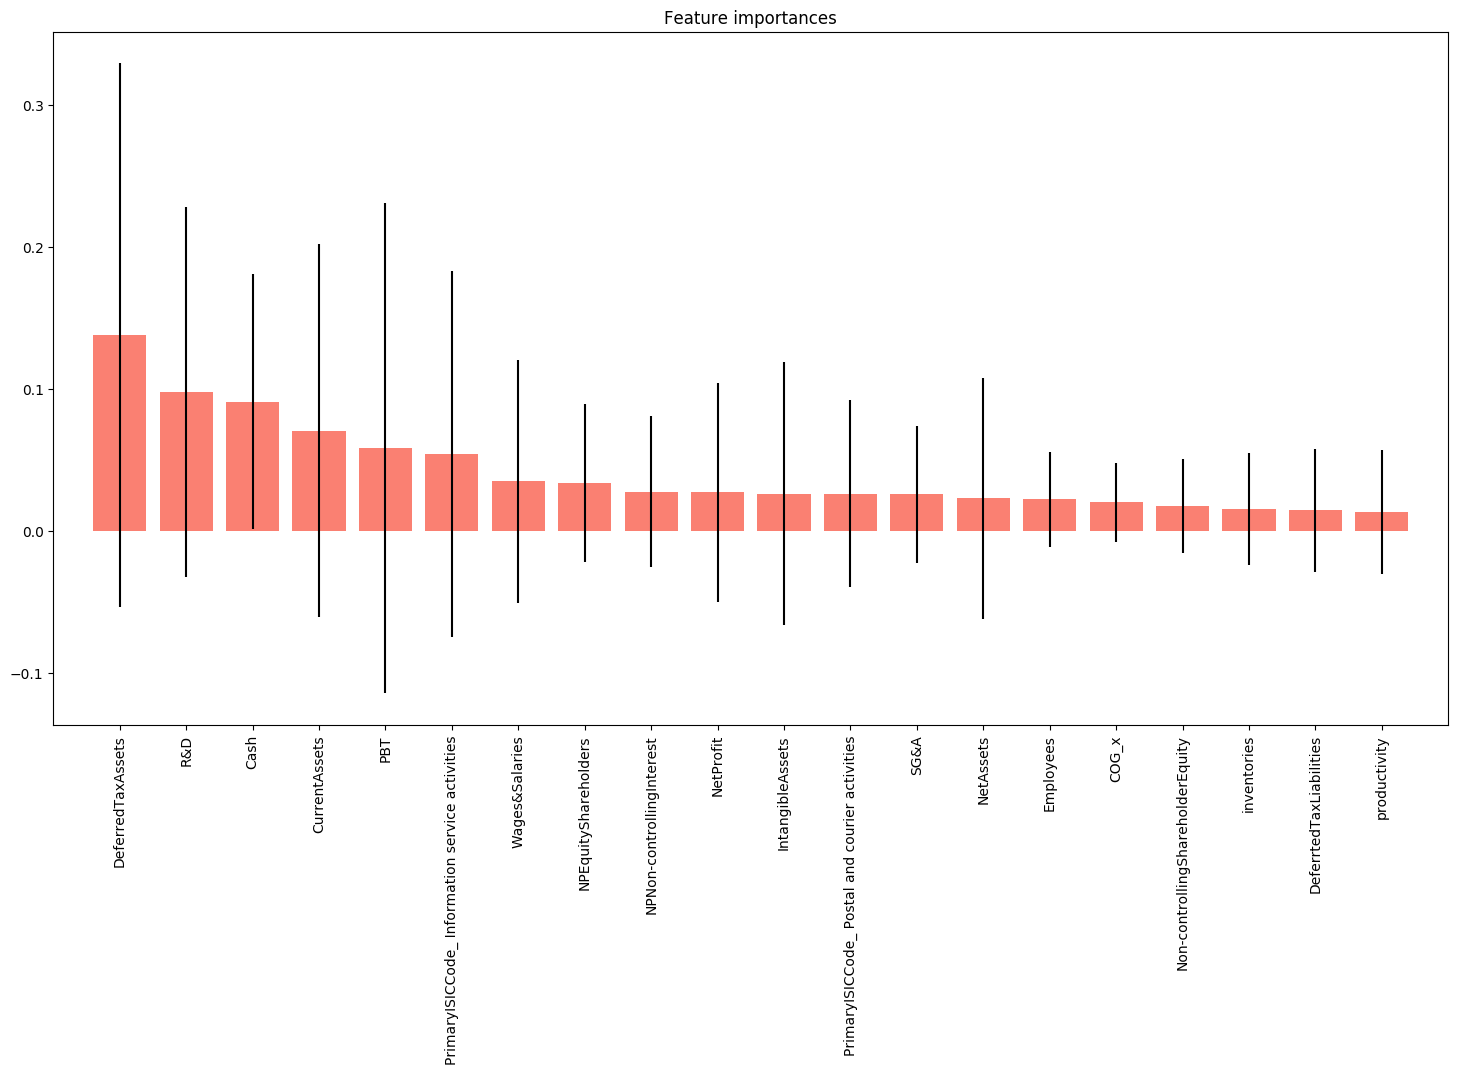

In [29]:
plt.figure(figsize=(18,9))
plt.title("Feature importances")
n=20
_ = plt.bar(range(n), importances[indices][:n], color="salmon", yerr=std[indices][:n])
plt.xticks(range(n), X.columns[indices])
plt.xlim([-1, n])
plt.xticks(rotation=90)
plt.show()